# import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# path to string

In [2]:
path = r'C:\Users\leevg\OneDrive\Desktop\CF\DI\A4\03-2022 Instacart Basket Analysis'

# import data

In [9]:
# Get shape of each original data set

In [3]:
orders_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders.csv'))

In [5]:
orders_original.shape

(3421083, 7)

In [7]:
orders_products_prior = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'order_products__prior.csv'))

In [8]:
orders_products_prior.shape

(32434489, 4)

In [10]:
products_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'))

In [11]:
products_original.shape

(49693, 5)

In [12]:
customers_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [13]:
customers_original.shape

(206209, 10)

In [14]:
# Get shape of each checked data set

In [15]:
orders_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_cleaned.csv'))

In [16]:
orders_cleaned.shape

(3421083, 9)

In [17]:
products_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_cleaned.csv'))

In [18]:
products_cleaned.shape

(49672, 6)

In [19]:
# Get shape of final data sets

In [20]:
ords_prods_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_combined.pkl'))

In [21]:
ords_prods_combined.shape

(32434489, 11)

In [22]:
ords_prods_merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.csv'))

In [23]:
ords_prods_merged.shape

(32404859, 15)

# create visualizations

In [114]:
df_secure = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 Data Set.pkl'))

# 2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [107]:
# Showing average order price per each hour of the day

In [11]:
avg_price_per_hour = df_secure.groupby('order_hour_of_day').agg({'prices': ['mean']})

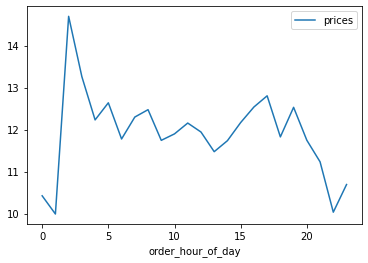

In [12]:
avg_price_per_hour_chart = sns.lineplot(data = avg_price_per_hour)

In [13]:
avg_price_per_hour_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_price_per_hour.png'))

# 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [15]:
df_secure['prices'].value_counts(dropna = False)

12.3    624261
10.3    510496
4.0     447272
6.3     438467
1.3     425691
         ...  
20.2       123
22.7        99
21.5        85
18.3        11
21.0         8
Name: prices, Length: 242, dtype: int64

In [22]:
df_secure['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [23]:
# Price range flag

In [38]:
df_secure.loc[(df_secure['prices'] >= 0) & (df_secure['prices'] < 7.4), 'price_range_flag'] = 'Low price group'

In [39]:
df_secure.loc[(df_secure['prices'] >= 7.4) & (df_secure['prices'] < 12), 'price_range_flag'] = 'Average price group'

In [43]:
df_secure.loc[(df_secure['prices'] >= 12) & (df_secure['prices'] < 100), 'price_range_flag'] = 'High price group'

In [44]:
df_secure.loc[df_secure['prices'] >= 100, 'price_range_flag'] = 'Extremely high price group'

In [45]:
df_secure['price_range_flag'].value_counts(dropna = False)

Low price group               16155666
Average price group            9645062
High price group               6599004
Extremely high price group        5127
Name: price_range_flag, dtype: int64

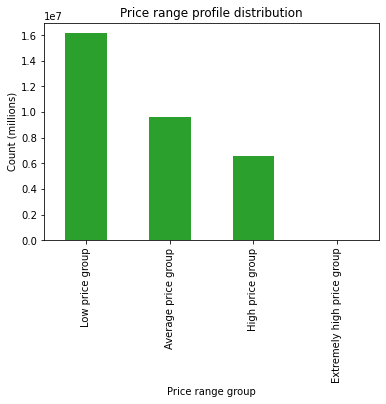

In [49]:
price_range_chart = df_secure['price_range_flag'].value_counts().plot.bar(color = 'tab:green', xlabel = 'Price range group', ylabel = 'Count (millions)', title = 'Price range profile distribution')

In [50]:
price_range_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_profile_distribution.png'))

# 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [106]:
# Bar chart to show total counts of each produce category order.

In [58]:
product_crosstab = pd.crosstab(df_secure['goods_profile'], df_secure['order_number'], dropna = False)

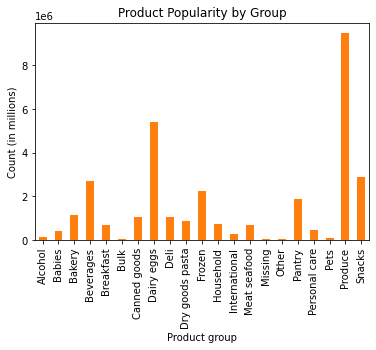

In [67]:
product_crosstab_chart = product_crosstab.plot(stacked = True, kind = 'bar', xlabel = 'Product group', ylabel = 'Count (in millions)', title = 'Product Popularity by Group', legend = None, color = 'tab:orange')

In [68]:
product_crosstab_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_popularity.png'))

# 5a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [105]:
# Pie chart to show distribution of each loyalty status

In [94]:
loyalty = df_secure['loyalty_flag'].value_counts(dropna = False)

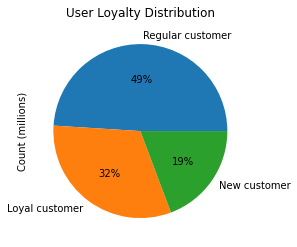

In [95]:
loyalty_chart = loyalty.plot.pie(autopct='%1.0f%%', title = 'User Loyalty Distribution', ylabel = 'Count (millions)')

In [96]:
loyalty_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_chart.png'))

# 5b. Are there differences in ordering habits based on a customer’s loyalty status?

In [104]:
# Comparing loyalty status with spending flag

In [98]:
loyalty_avg_price = pd.crosstab(df_secure['loyalty_flag'], df_secure['spending_flag'], dropna = False)

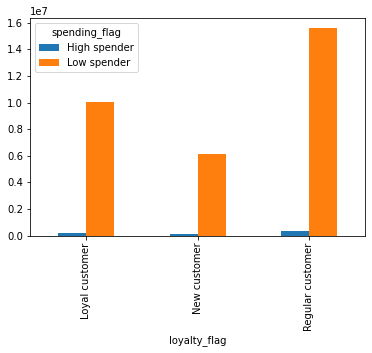

In [100]:
loyalty_avg_price_chart = loyalty_avg_price.plot.bar()

In [96]:
loyalty_avg_price_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_avg_price_chart.png'))

# 5c. Are there differences in ordering habits based on a customer’s region?

In [103]:
# Comparing region and loyalty status

In [100]:
region_loyalty = pd.crosstab(df_secure['region'], df_secure['loyalty_flag'], dropna = False)

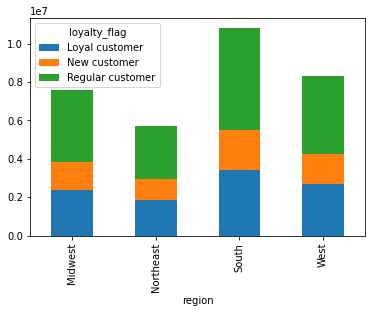

In [101]:
region_loyalty_chart = region_loyalty.plot.bar(stacked = True)

In [102]:
region_loyalty_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_loyalty.png'))

# 5d. Is there a connection between age and family status in terms of ordering habits?

In [108]:
# Dependents status and ordering habits

In [112]:
dependents_habits = pd.crosstab(df_secure['loyalty_flag'], df_secure['dependents_profile'], dropna = False)

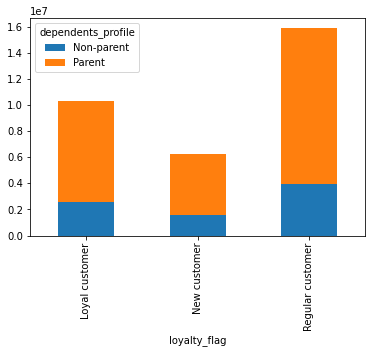

In [114]:
dependents_habits_chart = dependents_habits.plot.bar(stacked = True)

In [116]:
dependents_habits_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_habits.png'))

In [117]:
# Age and ordering habits

In [4]:
age_habits = pd.crosstab(df_secure['age_profile'], df_secure['loyalty_flag'])

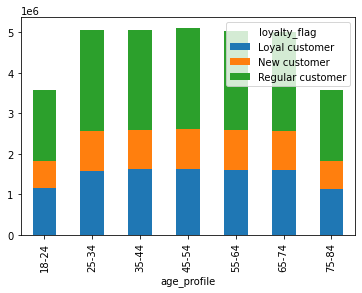

In [6]:
age_habits_chart = age_habits.plot.bar(stacked = True)

In [7]:
age_habits_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_habits_chart.png'))

In [116]:
fam_age = pd.crosstab(df_secure['fam_status'], df_secure['age_profile'], dropna = False)

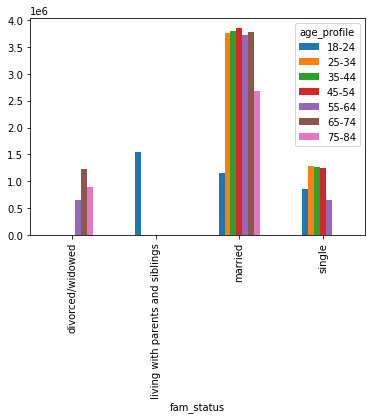

In [117]:
fam_age_chart = fam_age.plot.bar()

In [119]:
fam_age_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_age.png'))

# 5e. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

In [27]:
# Age demographic

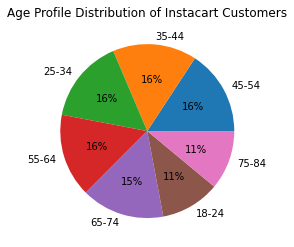

In [12]:
age_demographics = df_secure['age_profile'].value_counts().plot.pie(autopct='%1.0f%%', ylabel = '', title = 'Age Profile Distribution of Instacart Customers')

In [13]:
age_demographics_chart = age_demographics.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_demographics.png'))

In [28]:
# Income demographic

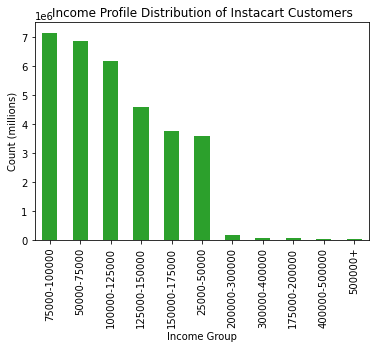

In [25]:
income_demographics = df_secure['income_profile'].sort_index().value_counts().plot.bar(xlabel = 'Income Group', ylabel = 'Count (millions)', title = 'Income Profile Distribution of Instacart Customers', color = 'tab:green')

In [26]:
income_demographics_chart = income_demographics.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_demographics.png'))

In [29]:
# Type of goods demographic

In [30]:
dependents_products = pd.crosstab(df_secure['dependents_profile'], df_secure['goods_profile'], dropna = False)

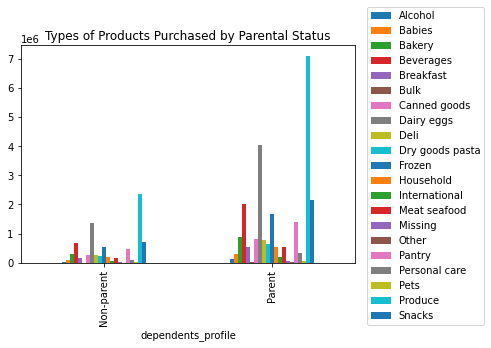

In [42]:
dependents_products_chart = dependents_products.plot.bar(title = 'Types of Products Purchased by Parental Status')
plt.legend(bbox_to_anchor = (1.4, 1.2))

In [43]:
dependents_products_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_products.png'))

# 5f. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [68]:
# Dependency status and order frequency

In [58]:
dependents_frequency = pd.crosstab(df_secure['dependents_profile'], df_secure['days_since_prior_order'], dropna = False)

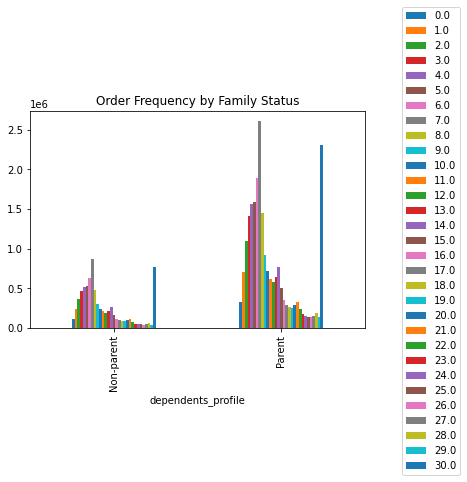

In [66]:
dependents_frequency_chart = dependents_frequency.plot.bar(title = 'Order Frequency by Family Status')
plt.legend(bbox_to_anchor = (1.3, 1.5))

In [67]:
dependents_frequency_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_frequency.png'))

In [91]:
# Dependents order time

In [69]:
dependents_time = pd.crosstab(df_secure['order_hour_of_day'], df_secure['dependents_profile'], dropna = False)

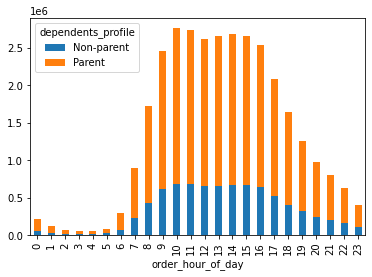

In [71]:
dependents_time_chart = dependents_time.plot.bar(stacked = True)

In [72]:
dependents_time_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_time.png'))

In [90]:
# Goods by region

In [73]:
region_goods = pd.crosstab(df_secure['goods_profile'], df_secure['region'], dropna = False)

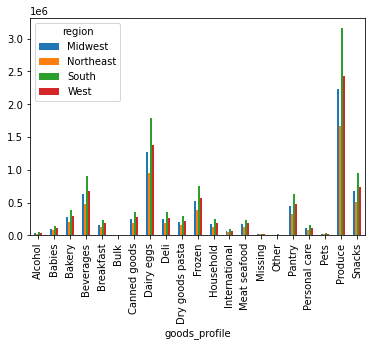

In [82]:
region_goods_chart = region_goods.plot.bar()

In [83]:
region_goods_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_goods.png'))

In [89]:
# Family and loyalty 

In [86]:
fam_loyalty = pd.crosstab(df_secure['loyalty_flag'], df_secure['fam_status'], dropna = False)

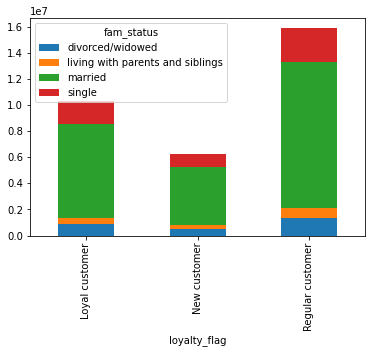

In [88]:
fam_loyalty_chart = fam_loyalty.plot.bar(stacked = True)

In [92]:
fam_loyalty_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_loyalty.png'))